In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import warnings
warnings.filterwarnings('ignore')

In [30]:
df1 =pd.read_csv('/content/drive/My Drive/Colab Notebooks/Company Stock and Investment.csv')
df1

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793


In [31]:
df1.tail()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793
1983,15-11-2017,-0.007006,0.005963,-0.013190,-0.008928


In [32]:
df1.columns=["Date","Oil","Gold","Comp_stock","Other_share"]
df1

,Date,Oil,Gold,Comp_stock,Other_share
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013
...,...,...,...,...,...
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793


In [33]:
df1.shape

(1984, 5)

In [34]:
null_columns=df1.columns[df1.isnull().any()]
df1[null_columns].isnull().sum()

Series([], dtype: float64)

In [35]:
df1.dtypes

Date            object
Oil            float64
Gold           float64
Comp_stock     float64
Other_share    float64
dtype: object

In [36]:
df= pd.DataFrame(df1)

# convert the datetime column to a datetime type
df.Date = pd.to_datetime(df.Date)

# set the column as the index
df.set_index('Date', inplace=True)

In [37]:
df.head()

,Oil,Gold,Comp_stock,Other_share
Date,,,,
2009-12-31,0.025417,0.000150,0.017354,0.006848
2010-04-01,0.026830,0.001097,0.015565,-0.004609
2010-05-01,0.002699,0.001560,0.001729,0.005900
2010-06-01,0.021688,0.006009,-0.015906,-0.018116
2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [38]:
df.describe()

,Oil,Gold,Comp_stock,Other_share
count,1984.000000,1984.000000,1984.000000,1984.000000
mean,-0.000435,-0.020152,0.001007,0.001269
std,0.030869,0.140965,0.016017,0.019733
min,-1.000000,-1.000000,-0.123558,-0.126568
25%,-0.011021,-0.005881,-0.006926,-0.008492
50%,0.000277,0.000000,0.000876,0.000840
75%,0.010734,0.005454,0.009708,0.011632
max,0.119511,0.049577,0.088741,0.157457


In [39]:
df_oil=pd.DataFrame(data=df)
df_oil.drop("Gold",axis=1,inplace=True)
df_oil.drop("Comp_stock",axis=1,inplace=True)
df_oil.drop("Other_share",axis=1,inplace=True)
df_oil

,Oil
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256
...,...
2017-09-11,0.005984
2017-10-11,-0.007173
2017-11-13,0.000352


In [40]:
df_gold=pd.DataFrame(data=df)
df_gold.drop("Oil",axis=1,inplace=True)
df_gold.drop("Comp_stock",axis=1,inplace=True)
df_gold.drop("Other_share",axis=1,inplace=True)
df_gold

,Gold
Date,
2009-12-31,0.000150
2010-04-01,0.001097
2010-05-01,0.001560
2010-06-01,0.006009
2010-07-01,0.000221
...,...
2017-09-11,0.000623
2017-10-11,-0.000389
2017-11-13,-0.004944


In [41]:
df_Comp_stock=pd.DataFrame(data=df)
df_Comp_stock.drop("Oil",axis=1,inplace=True)
df_Comp_stock.drop("Gold",axis=1,inplace=True)
df_Comp_stock.drop("Other_share",axis=1,inplace=True)
df_Comp_stock

,Comp_stock
Date,
2009-12-31,0.017354
2010-04-01,0.015565
2010-05-01,0.001729
2010-06-01,-0.015906
2010-07-01,-0.001849
...,...
2017-09-11,-0.002043
2017-10-11,-0.006880
2017-11-13,-0.004008


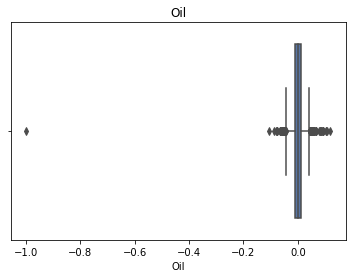

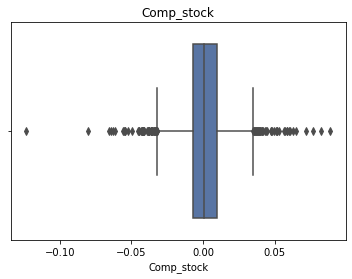

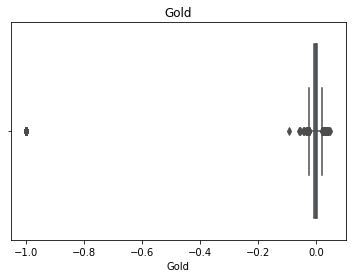

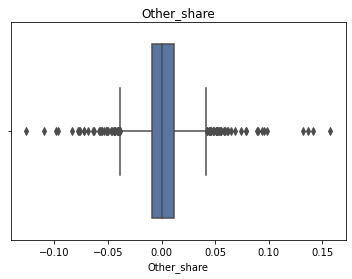

In [42]:
import seaborn as sns
columns={'Oil', 'Gold', 'Comp_stock', 'Other_share'}
for i in columns:
    plt.figure()
    plt.clf()
    sns.boxplot(df[i],palette="deep")
    plt.title(i)
    plt.show()

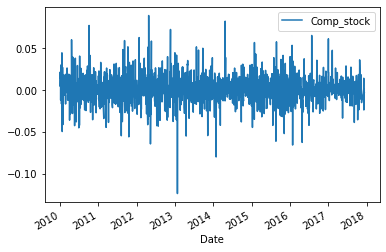

In [43]:
#plot Comp_stock
df_Comp_stock.plot()

In [44]:
df_Comp_stock = df_Comp_stock.replace(0, np.nan)
df_Comp_stock

,Comp_stock
Date,
2009-12-31,0.017354
2010-04-01,0.015565
2010-05-01,0.001729
2010-06-01,-0.015906
2010-07-01,-0.001849
...,...
2017-09-11,-0.002043
2017-10-11,-0.006880
2017-11-13,-0.004008


In [45]:
df_Comp_stock.isnull().sum()

Comp_stock    2
dtype: int64

In [46]:
df_Comp_Stock=df_Comp_stock.dropna(how='any')

In [47]:
df_Comp_Stock.Comp_stock.round(3)

Date
2009-12-31    0.017
2010-04-01    0.016
2010-05-01    0.002
2010-06-01   -0.016
2010-07-01   -0.002
              ...  
2017-09-11   -0.002
2017-10-11   -0.007
2017-11-13   -0.004
2017-11-14   -0.015
2017-11-15   -0.013
Name: Comp_stock, Length: 1982, dtype: float64

In [48]:
# adfuller give us 5 values
test_result=adfuller(df_Comp_Stock['Comp_stock'])

In [49]:
# just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-12.481458670962319, 3.084821113179924e-23, 12, 1969, {'1%': -3.433675467561267, '5%': -2.863008999826203, '10%': -2.5675520348463654}, -10637.541220712725)


In [50]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test_Comp_stock(Comp_stock):
    result=adfuller(Comp_stock)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [51]:
adfuller_test_Comp_stock(df_Comp_Stock['Comp_stock'])

ADF Test Statistic : -12.481458670962319
p-value : 3.084821113179924e-23
#Lags Used : 12
Number of Observations Used : 1969
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


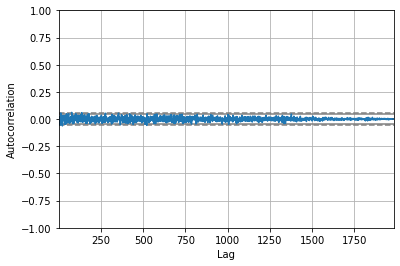

In [52]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_Comp_Stock['Comp_stock'])
plt.show()

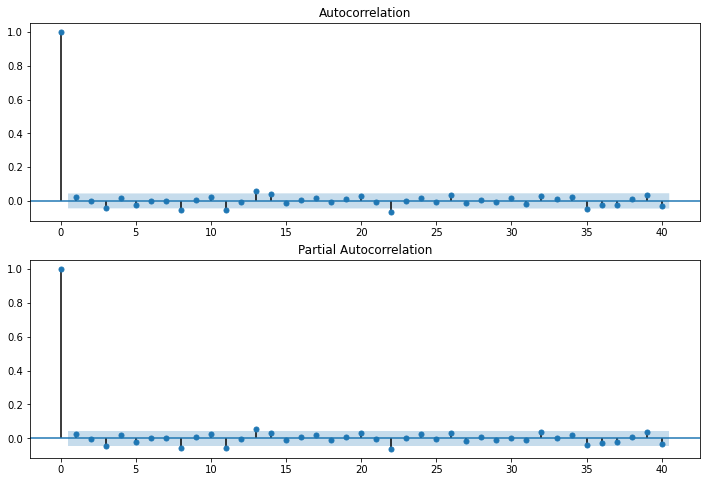

In [53]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# No  values are null so we will start from 1
fig = sm.graphics.tsa.plot_acf(df_Comp_Stock['Comp_stock'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_Comp_Stock['Comp_stock'].iloc[1:],lags=40,ax=ax2)

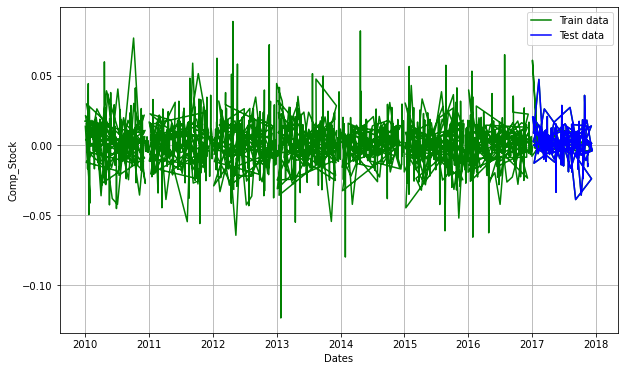

In [54]:
#split data into train and training set
df_log=df_Comp_Stock
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Comp_Stock')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [55]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 4.4MB/s 
     |████████████████████████████████| 808kB 22.4MB/s 
     |████████████████████████████████| 2.1MB 27.8MB/s 
     |████████████████████████████████| 8.7MB 47.6MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 50.3.2
    Uninstalling setuptools-50.3.2:
      Successfully uninstalled setuptools-50.3.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [56]:
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-9553.320, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-9552.460, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-9552.456, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-9550.460, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-9557.120, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-9555.987, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-9555.990, Time=0.39 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-9553.950, Time=0.38 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.912 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 1780
Model:                        SARIMAX   Log Likelihood                4780.560
Date:                Sun, 01 Nov 2020   AIC                          -9557.120
Time:                       

In [57]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df_Comp_Stock['Comp_stock'],order=(0,0,0)) # this order is p d q(0 or 1) 
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Comp_stock   No. Observations:                 1982
Model:                     ARMA(0, 0)   Log Likelihood                5381.003
Method:                           css   S.D. of innovations              0.016
Date:                Sun, 01 Nov 2020   AIC                         -10758.006
Time:                        18:03:01   BIC                         -10746.823
Sample:                             0   HQIC                        -10753.898
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.000      2.802      0.005       0.000       0.002
==============================================================================
"""

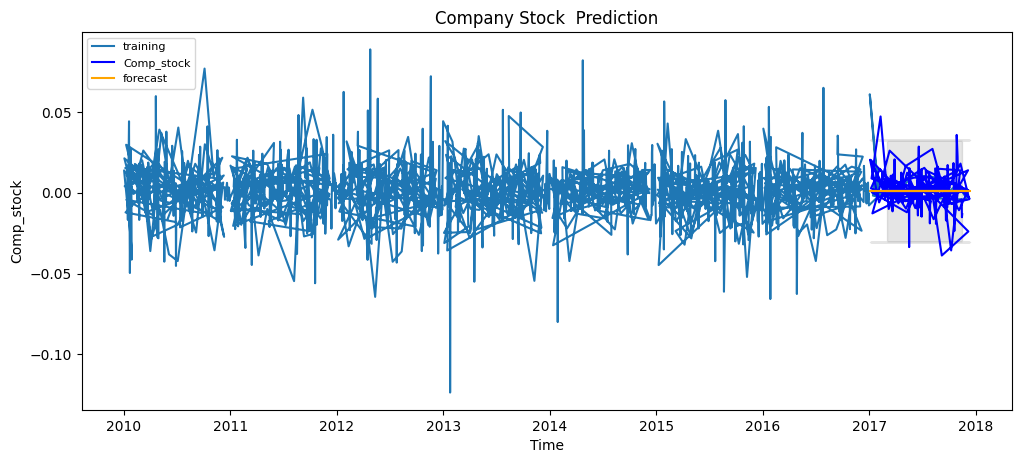

In [58]:
# Forecast
fc, se, conf = model_fit.forecast(199, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Comp_stock')
plt.plot(fc_series, color = 'orange',label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Company Stock  Prediction')
plt.xlabel('Time')
plt.ylabel('Comp_stock')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))


MSE: 0.00011987962962935485
MAE: 0.00787184874473772
RMSE: 0.010948955641035124


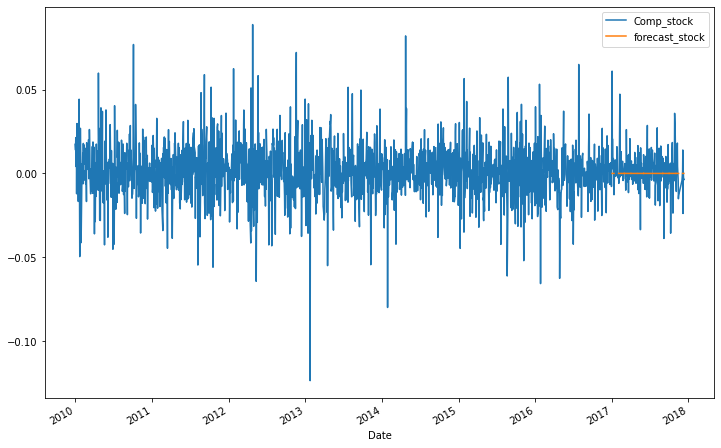

In [60]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax
model=sm.tsa.statespace.SARIMAX(df_Comp_Stock['Comp_stock'],order=(0, 0, 0)) #(p,d,q)
results_stock=model.fit()
df_Comp_Stock['forecast_stock']=results_stock.predict(start=1781,end=1981,dynamic=False)
df_Comp_Stock[['Comp_stock','forecast_stock']].plot(figsize=(12,8))

**`Gold - Testing For Stationarity`**

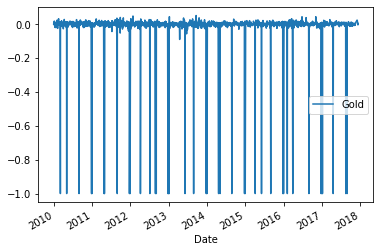

In [61]:
#plot Gold
df_gold.plot()

In [62]:
df_gold = df_gold.replace(0, np.nan)
df_gold

,Gold
Date,
2009-12-31,0.000150
2010-04-01,0.001097
2010-05-01,0.001560
2010-06-01,0.006009
2010-07-01,0.000221
...,...
2017-09-11,0.000623
2017-10-11,-0.000389
2017-11-13,-0.004944


In [63]:
df_gold.isnull().sum()

Gold    64
dtype: int64

In [64]:
df_gold["Gold"] = df_gold["Gold"].fillna(df_gold["Gold"].dropna().mode().values[0] )

In [65]:
test_result_gold=adfuller(df_gold['Gold']) # adfuller give us 5 values

In [66]:
# just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result_gold)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-16.314261015489084, 3.1736637996189835e-29, 5, 1978, {'1%': -3.4336603168110695, '5%': -2.8630023108088545, '10%': -2.5675484732666}, -813.3817952641643)


In [67]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Gold):
    result=adfuller(Gold)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [68]:
adfuller_test(df_gold['Gold'])

ADF Test Statistic : -16.314261015489084
p-value : 3.1736637996189835e-29
#Lags Used : 5
Number of Observations Used : 1978
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [69]:
df_gold=df_gold.dropna(how='any')

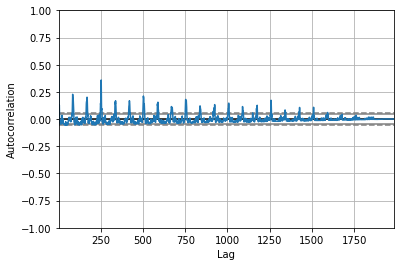

In [70]:
autocorrelation_plot(df_gold['Gold'])
plt.show()

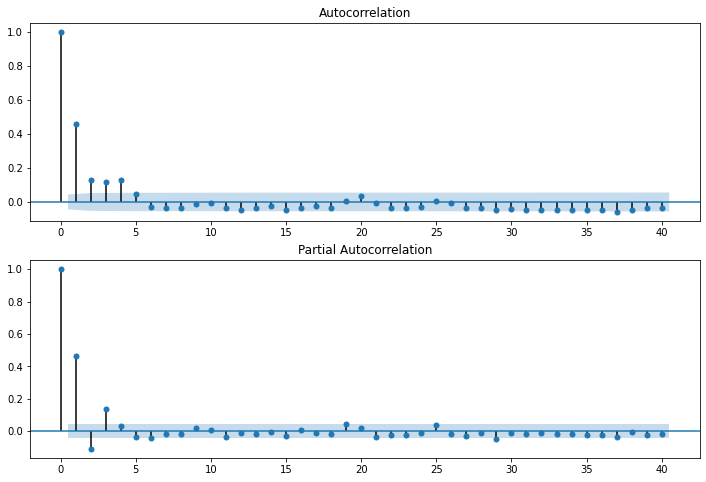

In [71]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# No values are null so we will start from 1
fig = sm.graphics.tsa.plot_acf(df_gold['Gold'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_gold['Gold'].iloc[1:],lags=40,ax=ax2)

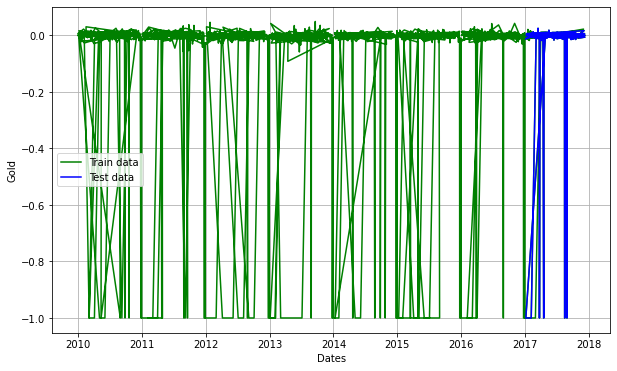

In [72]:
#split data into train and training set
df_log=df_gold
train_data_gold, test_data_gold = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Gold')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data_gold, 'blue', label='Test data')
plt.legend()

In [73]:
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(train_data_gold, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-161.252, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-656.840, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-637.818, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-664.217, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-705.590, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-707.856, Time=0.50 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-676.681, Time=0.46 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-710.829, Time=0.56 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-695.624, Time=0.60 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-708.908, Time=1.10 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-698.849, Time=1.13 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-737.960, Time=1.78 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-722.468, Time=2.27 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-733.715, Time=1.67 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept

In [74]:
from statsmodels.tsa.arima_model import ARIMA
model_gold=ARIMA(df_gold['Gold'],order=(3,0,2)) # this order is p d q 
model_fit_gold=model_gold.fit(disp=-1)
model_fit_gold.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Gold   No. Observations:                 1984
Model:                     ARMA(3, 2)   Log Likelihood                 431.004
Method:                       css-mle   S.D. of innovations              0.195
Date:                Sun, 01 Nov 2020   AIC                           -848.008
Time:                        18:03:24   BIC                           -808.857
Sample:                             0   HQIC                          -833.627
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0523      0.009     -6.109      0.000      -0.069      -0.036
ar.L1.Gold     0.6659      0.139      4.800      0.000       0.394       0.938
ar.L2.Gold    -0.4955      0.126     -3.942      0.000      -0.742      -0.249
ar.L3.Gold     0.2640      0.051      5.228      0.000       0.165       0.363
ma.L1.Gold    -0.1464      0.143     -1.024      0.306      -0.427       0.134
ma.L2.Gold     0.2557      0.107      2.401      0.016       0.047       0.464
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0873           -1.4891j            1.4916           -0.2407
AR.2            0.0873           +1.4891j            1.4916            0.2407
AR.3            1.7023           -0.0000j            1.7023           -0.0000
MA.1            0.2862           -1.9567j            1.9775           -0.2269
MA.2            0.2862           +1.9567j            1.9775            0.2269
-----------------------------------------------------------------------------
"""

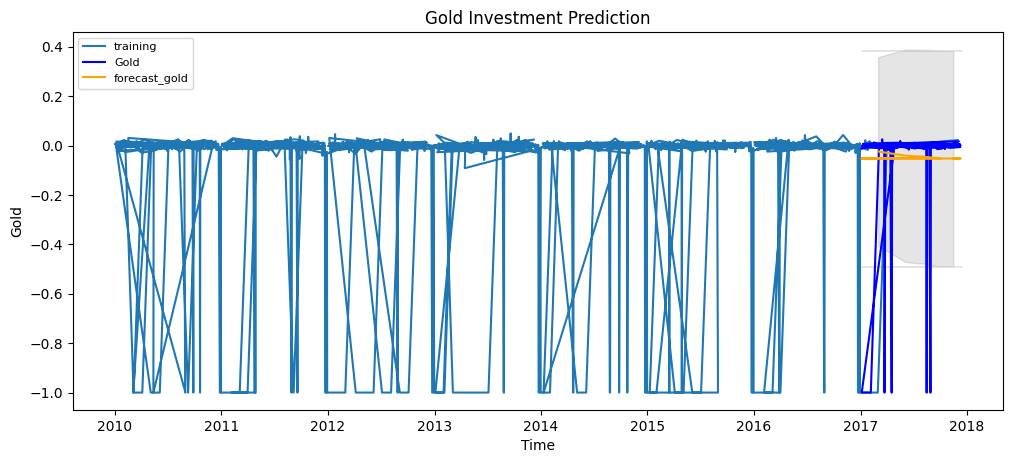

In [75]:
# Forecast
fc, se, conf = model_fit_gold.forecast(199, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data_gold.index)
lower_series = pd.Series(conf[:, 0], index=test_data_gold.index)
upper_series = pd.Series(conf[:, 1], index=test_data_gold.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data_gold, label='training')
plt.plot(test_data_gold, color = 'blue', label='Gold')
plt.plot(fc_series, color = 'orange',label='forecast_gold')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Gold Investment Prediction')
plt.xlabel('Time')
plt.ylabel('Gold')
plt.legend(loc='upper left', fontsize=8)
plt.show()

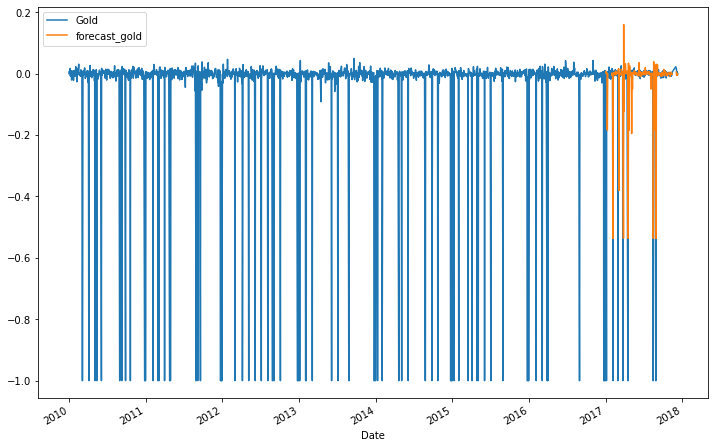

In [76]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax
model=sm.tsa.statespace.SARIMAX(df_gold['Gold'],order=(3, 0, 2)) #(p,d,q)
results=model.fit()
df_gold['forecast_gold']=results.predict(start=1781,end=1982,dynamic=False)
df_gold[['Gold','forecast_gold']].plot(figsize=(12,8))

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# report performance
mse = mean_squared_error(test_data_gold, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data_gold, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data_gold, fc))
print('RMSE: '+str(rmse))

MSE: 0.04326787998651208
MAE: 0.09274652115252396
RMSE: 0.2080093266815507


**`Oil - Testing For Stationarity`**

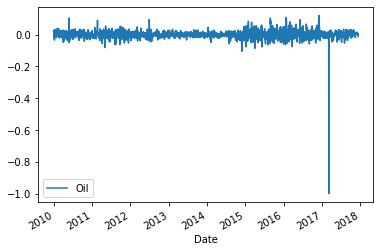

In [78]:
#plot Comp_stock
df_oil.plot()

In [79]:
df_oil = df_oil.replace(0, np.nan)
df_oil

,Oil
Date,
2009-12-31,0.025417
2010-04-01,0.026830
2010-05-01,0.002699
2010-06-01,0.021688
2010-07-01,-0.006256
...,...
2017-09-11,0.005984
2017-10-11,-0.007173
2017-11-13,0.000352


In [80]:
df_oil.isnull().sum()

Oil    11
dtype: int64

In [81]:
df_oil.fillna(df_oil.mean(), inplace=True)

In [82]:
df_oil.Oil.round(3)

Date
2009-12-31    0.025
2010-04-01    0.027
2010-05-01    0.003
2010-06-01    0.022
2010-07-01   -0.006
              ...  
2017-09-11    0.006
2017-10-11   -0.007
2017-11-13    0.000
2017-11-14   -0.019
2017-11-15   -0.007
Name: Oil, Length: 1984, dtype: float64

In [83]:
df_oil.shape

(1984, 1)

In [84]:
from scipy.stats import zscore
z_score=abs(zscore(df_oil))
print(df_oil.shape)

(1984, 1)


In [85]:
df_Oil=df_oil.loc[(z_score<2).all(axis=1)]
print(df_Oil.shape)

(1955, 1)


In [86]:
df_Oil.isnull().sum()

Oil    0
dtype: int64

In [87]:
test_result_oil=adfuller(df_Oil['Oil']) # adfuller give us 5 values

In [88]:
# just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result_oil)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-16.079299916851483, 5.40018309042038e-29, 5, 1949, {'1%': -3.433709637523333, '5%': -2.863024085652552, '10%': -2.567560067343214}, -9860.758910387813)


In [89]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test_oil(Oil):
    result=adfuller(Oil)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")

In [90]:
adfuller_test_oil(df_Oil['Oil'])

ADF Test Statistic : -16.079299916851483
p-value : 5.40018309042038e-29
#Lags Used : 5
Number of Observations Used : 1949
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


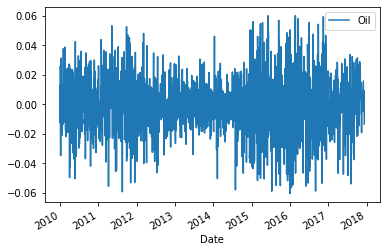

In [91]:
df_Oil.plot()

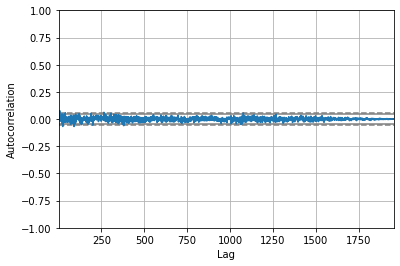

In [92]:
autocorrelation_plot(df_Oil['Oil'])
plt.show()

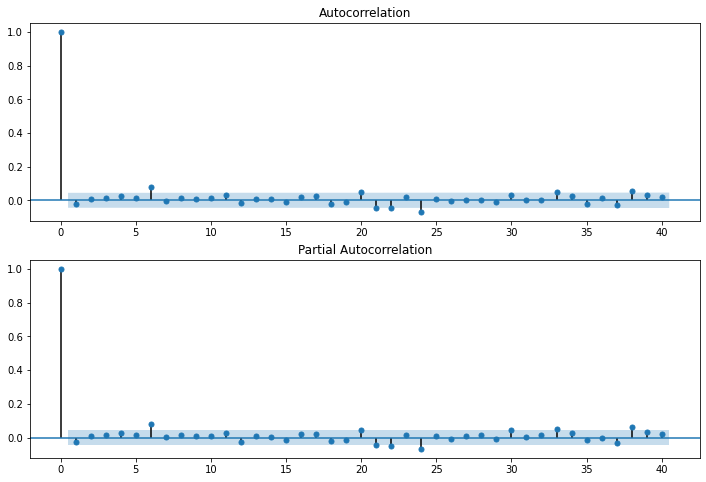

In [93]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# No values are null so we will start from 1
fig = sm.graphics.tsa.plot_acf(df_Oil['Oil'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_Oil['Oil'].iloc[1:],lags=40,ax=ax2)

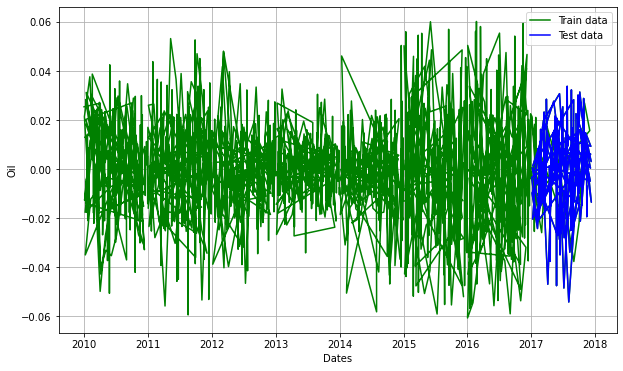

In [94]:
#split data into train and training set
df_log=df_Oil
train_data_oil, test_data_oil = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Oil')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data_oil, 'blue', label='Test data')
plt.legend()

In [95]:
from pmdarima.arima import auto_arima
model_autoARIMA = auto_arima(train_data_oil, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-8918.414, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-8917.617, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-8917.618, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-8915.618, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-8917.449, Time=0.27 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.020 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 1756
Model:                        SARIMAX   Log Likelihood                4460.207
Date:                Sun, 01 Nov 2020   AIC                          -8918.414
Time:                        18:03:29   BIC                          -8912.943
Sample:                             0   HQIC                         -8916.392
                               - 1756                                  

In [96]:
from statsmodels.tsa.arima_model import ARIMA
model_oil=ARIMA(df_Oil['Oil'],order=(1,0,1)) # this order is p d q 
model_fit_oil=model_oil.fit(disp=-1)
model_fit_oil.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    Oil   No. Observations:                 1955
Model:                     ARMA(1, 1)   Log Likelihood                4998.413
Method:                       css-mle   S.D. of innovations              0.019
Date:                Sun, 01 Nov 2020   AIC                          -9988.827
Time:                        18:03:29   BIC                          -9966.514
Sample:                             0   HQIC                         -9980.625
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.000     -0.819      0.413      -0.001       0.000
ar.L1.Oil     -0.8411      0.172     -4.902      0.000      -1.177      -0.505
ma.L1.Oil      0.8247      0.179      4.601      0.000       0.473       1.176
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1889           +0.0000j            1.1889            0.5000
MA.1           -1.2126           +0.0000j            1.2126            0.5000
-----------------------------------------------------------------------------
"""

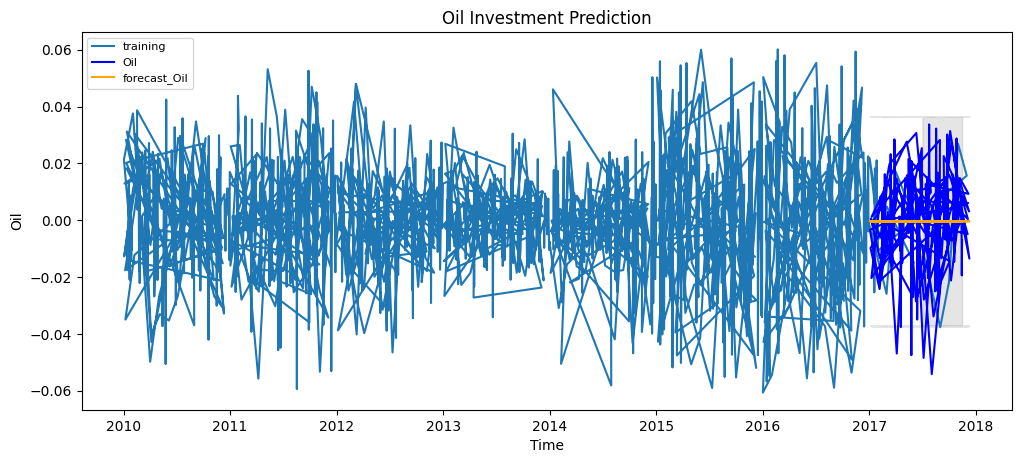

In [97]:
# Forecast
fc, se, conf = model_fit_oil.forecast(196, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data_oil.index)
lower_series = pd.Series(conf[:, 0], index=test_data_oil.index)
upper_series = pd.Series(conf[:, 1], index=test_data_oil.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data_oil, label='training')
plt.plot(test_data_oil, color = 'blue', label='Oil')
plt.plot(fc_series, color = 'orange',label='forecast_Oil')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Oil Investment Prediction')
plt.xlabel('Time')
plt.ylabel('Oil')
plt.legend(loc='upper left', fontsize=8)
plt.show()

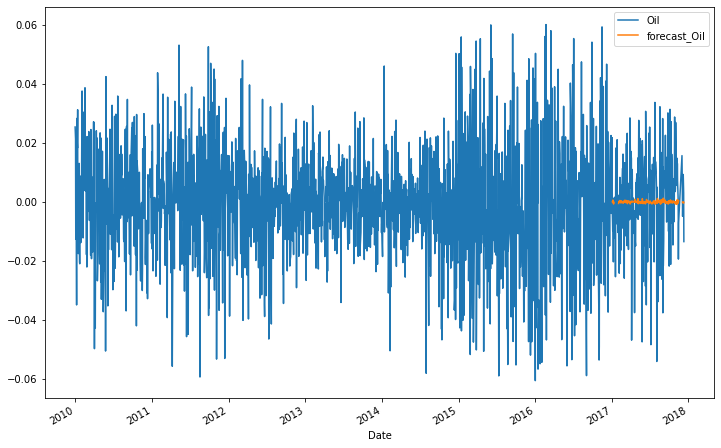

In [98]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax
model=sm.tsa.statespace.SARIMAX(df_Oil['Oil'],order=(1, 0, 1)) #(p,d,q)
results=model.fit()
df_Oil['forecast_Oil']=results.predict(start=1756,end=1954,dynamic=False)
df_Oil[['Oil','forecast_Oil']].plot(figsize=(12,8))

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
# report performance
mse = mean_squared_error(test_data_oil, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data_oil, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data_oil, fc))
print('RMSE: '+str(rmse))


MSE: 0.0002478269066513435
MAE: 0.012052055167628108
RMSE: 0.015742519069429247
